In [1]:
import sys, os
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), '../')))
from stochss_compute.cloud.ec2 import Cluster
import gillespy2
import numpy
from stochss_compute import RemoteSimulation, ComputeServer

In [2]:
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            ''' 
            PARAMETERS:
            These are constant values relevant to the system, such as reaction kinetic rates.
            
            name: user defined name for reference
            expression: constant value
            '''
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.51)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.11)
            
            # Add parameters to the model
            self.add_parameter([rate1,rate2,rate3])
            
            '''
            SPECIES:
            These can be anything that participates in or is produced by a reaction channel.
            
            name: A user defined name for the species
            initial_value: value/population count of species at start of simulation
            '''
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=121)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            
            # Add species to the model
            self.add_species([A, B, C, D])
            
            '''Reactions:
            These are the reaction channels causing the system to change over time
            
            name: a user defined name for the reaction
            reactants: dictionary with participant reactants as keys, and consumed per reaction as value.
            products: dictionary with reaction products as keys, and number formed per reaction as value.
            rate: parameter rate constant to be applied to the propensity of this reaction firing
            propensity_function: can be used instead of rate in order to declare a custom propensity function in string format'''
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            
            # Add reactions to the model
            self.add_reaction([r1,r2,r3])
            
            # Set timespan of model
            self.timespan(numpy.linspace(0,100,101))
myModel = MichaelisMenten()

In [3]:
cluster = Cluster()

In [4]:
cluster.launch_single_node_cluster()

Launching StochSS-Compute server instance.......(This could take a minute)
Instance "i-0e9cbe1567de8b13b" is now ready.


ec2.Instance(id='i-0e9cbe1567de8b13b')

In [8]:
results = cluster.run(myModel)

[ModelRunRequest] http://18.191.209.93:29681/api/v1/gillespy2/model/run
****************
The job is complete.


[GET] http://18.191.209.93:29681/api/v1/job/ce0d5b3af0d5ec38e1d3892536f9ef78-run_1/status
The job is complete.
4
[GET] http://18.191.209.93:29681/api/v1/memory/ce0d5b3af0d5ec38e1d3892536f9ef78-run_1/get
Results size: 2147
Expanded to: 37047


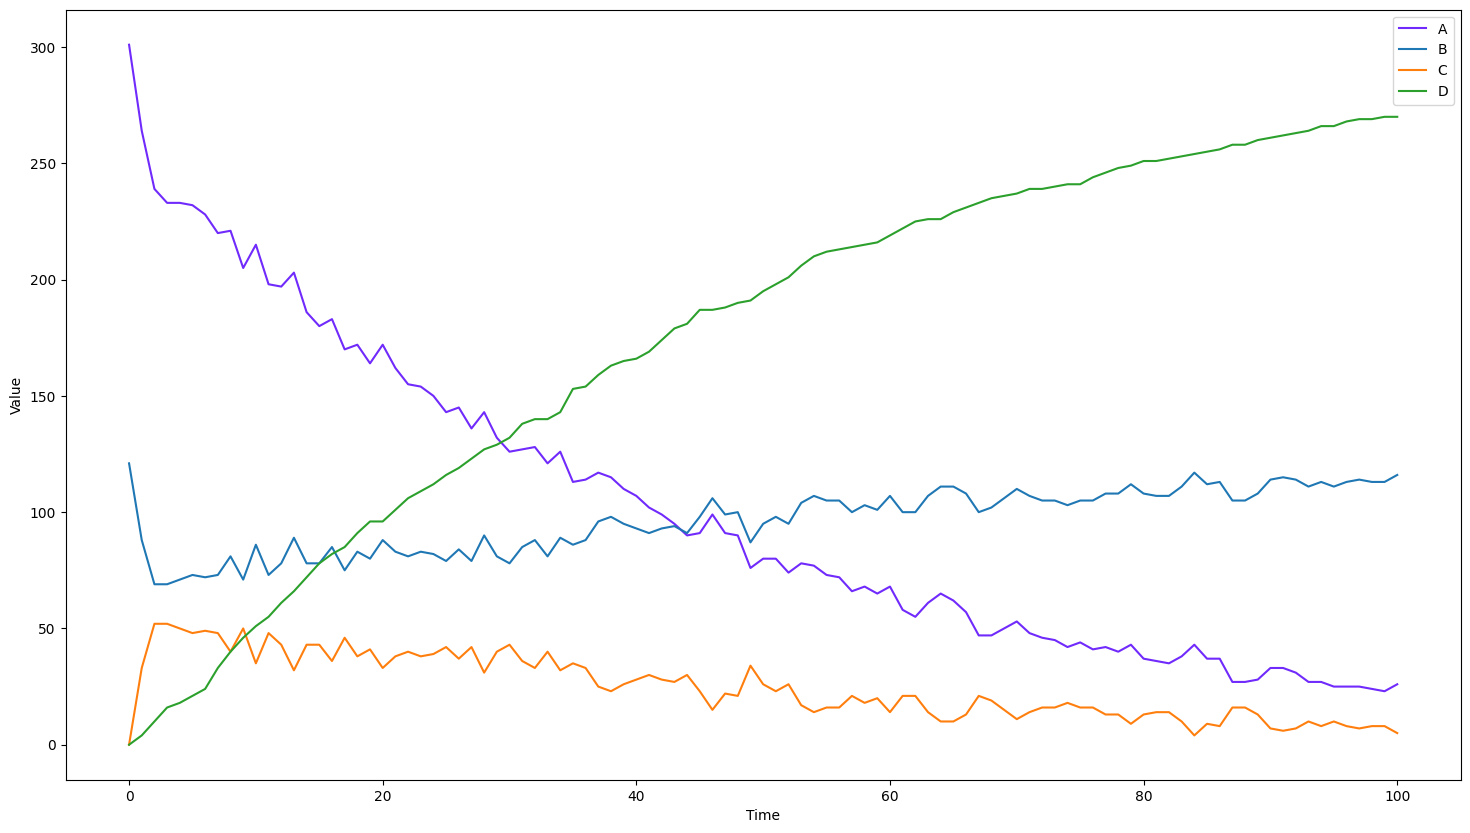

In [9]:
results = results.resolve()

results.plot()

In [10]:
cluster.clean_up()

Terminating "i-0e9cbe1567de8b13b". This might take a minute.......
Instance i-0e9cbe1567de8b13b" terminated.
Deleting sg-043acf17c86db489f.......
Security group sg-043acf17c86db489f deleted.
Deleting subnet-07b2d091a529369bb.......
Subnet subnet-07b2d091a529369bb deleted.
Detaching igw-036ab13dc84fd0bc1.......
Gateway igw-036ab13dc84fd0bc1 detached.
Deleting igw-036ab13dc84fd0bc1.......
Gateway igw-036ab13dc84fd0bc1 deleted.
Deleting vpc-0ff0179cf77348d91.......
VPC vpc-0ff0179cf77348d91 deleted.
Deleting key-0a2474ec9af0aacb6.......
Root key deleted.
